# Polynomial Regression Method

In [28]:
# import necessary libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt


In [29]:
diabetes = load_diabetes()
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = pd.Series(diabetes.target)

# Let's use only one feature for simplicity: 'bmi' (Body Mass Index)
X = X[['bmi']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [30]:
poly = PolynomialFeatures(degree=2)  # Degree 2 polynomial
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)


In [31]:
model = LinearRegression()
model.fit(X_train_poly, y_train)


LinearRegression()

In [32]:
y_pred = model.predict(X_test_poly)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'R²: {r2}')


MAE: 52.38391176015265
MSE: 4085.025480871632
R²: 0.2289715971205667


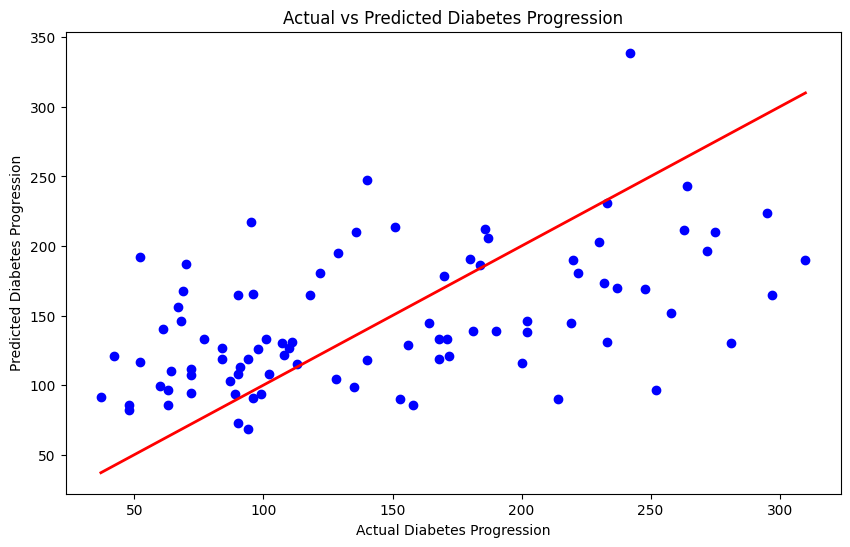

c:\Users\abbas\miniconda3\envs\ml_projects\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


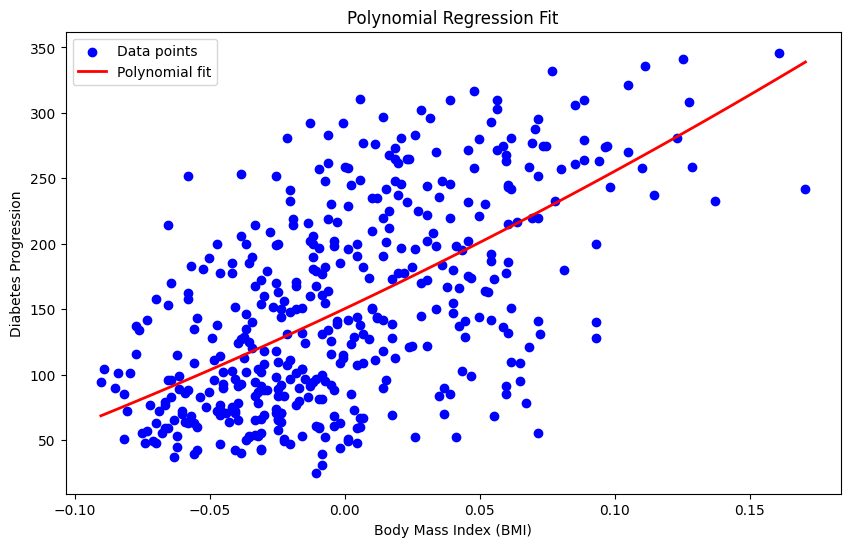

In [33]:
# Scatter plot for actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel('Actual Diabetes Progression')
plt.ylabel('Predicted Diabetes Progression')
plt.title('Actual vs Predicted Diabetes Progression')
plt.show()

# Plotting the polynomial regression line
plt.figure(figsize=(10, 6))
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_range_poly = poly.transform(X_range)
y_range_pred = model.predict(X_range_poly)
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X_range, y_range_pred, color='red', linewidth=2, label='Polynomial fit')
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Diabetes Progression')
plt.legend()
plt.title('Polynomial Regression Fit')
plt.show()
